
# Exploring Sentiment Analysis of Twitter Data: Understanding Public Opinion


Analyze sentiment trends across social media posts and evaluate brand perceptions

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('twitter_training.csv')

In [ ]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Define column names explicitly for clarity
column_name = ['Number','Entity','Sentiment','Content']
# Reload the dataset with specified column names
df = pd.read_csv('twitter_training.csv',names=column_name)

In [ ]:
df.head()

,Number,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Basic exploration of dataframe dimensions and structure

In [ ]:
df.shape

(74682, 4)

In [ ]:
df.describe

<bound method NDFrame.describe of        Number       Entity Sentiment  \
0        2401  Borderlands  Positive   
1        2401  Borderlands  Positive   
2        2401  Borderlands  Positive   
3        2401  Borderlands  Positive   
4        2401  Borderlands  Positive   
...       ...          ...       ...   
74677    9200       Nvidia  Positive   
74678    9200       Nvidia  Positive   
74679    9200       Nvidia  Positive   
74680    9200       Nvidia  Positive   
74681    9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]>

Check for missing values and remove rows with null values

In [ ]:
df.isnull().sum()

Number         0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [ ]:
df.dropna(axis=0,inplace= True)

In [ ]:
df.isnull().sum()

Number       0
Entity       0
Sentiment    0
Content      0
dtype: int64

 Check for and remove duplicate rows

In [ ]:
df.duplicated().sum()

2340

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(71656, 4)

Calculate sentiment counts and plot a bar chart to visualize sentiment distribution

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

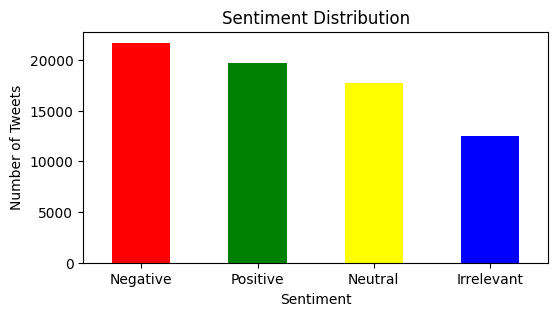

In [ ]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

Analyze sentiment specifically for a brand (Amazon in this case) and plot a pie chart




In [ ]:
brand_data = df[df['Entity'].str.contains('Amazon', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       1197
Negative       565
Positive       302
Irrelevant     185
Name: count, dtype: int64

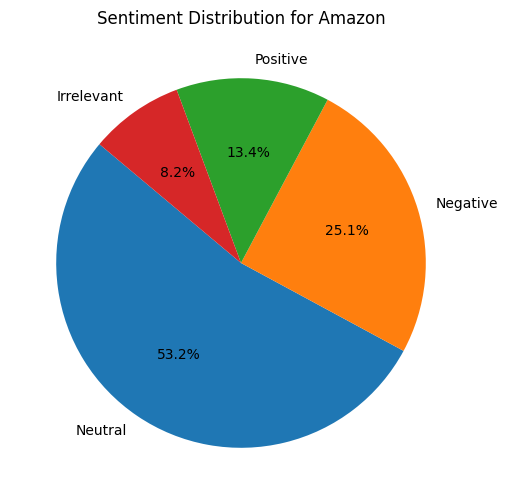

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Amazon')
plt.show()